## Homework 1
### Linear Regression

1. Ordinary least squares
2. Best subsets
3. Stepwise subsets

In [1]:
%matplotlib inline
# standard library
import itertools

# pandas
import pandas as pd

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.datasets

# this styling is purely my preference
# less chartjunk
sns.set_context('notebook', font_scale=1.5, rc={'line.linewidth': 2.5})
sns.set(style='ticks', palette='Set2')

/home/nikitautiu/anaconda2/envs/datascience3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
def ordinary_least_squares(X, Y):
    """Return the best coefficients using OLS"""
    # the design matrix has the vectors 
    # as rows instead of cols
    inv = np.linalg.inv(X.T.dot(X))
    return inv.dot(X.T.dot(Y))

def mse(X, beta, Y):
    # mean squared error
    return np.mean((X.dot(beta) - Y) ** 2)

def pad_design_matrix(X):
    """Return the design matrix padded with 
    the constant feature"""
    aux = np.ones((X.shape[0], X.shape[1]+1))
    aux[:, 1:] = X
    return aux

def all_subset_selection(X, Y):
    """Traverse all subsets of covariates and yield tuples
    of (# of covariates, train error)"""
    all_cols = range(X.shape[1])  # list of all columns
    for i in range(1, X.shape[1]+1):
        for cols in list(itertools.combinations(all_cols, i)):
            sub_X = X[:, cols]  # select only those features
            betas = ordinary_least_squares(sub_X, Y)
            yield (i, mse(sub_X, betas, Y))
    
def best_subset_selection(X, Y):    
    all_cols = range(X.shape[1])  # list of all columns
    for i in range(1, X.shape[1]+1):
        errs = []  # list of (err, col added) tuples
        for cols in list(itertools.combinations(all_cols, i)):
            sub_X = X[:, cols]  # select only those features
            betas = ordinary_least_squares(sub_X, Y)
            errs.append(mse(sub_X, betas, Y))
        best_result = min(errs)  # works because tuples
        yield (i, best_result)
            
def stepwise_subset_selection(X, Y):
    """Stepwise traverse the best subsets of covariates 
    and yield tuples of (# of covariates, train error)"""
    avail_cols = set(range(X.shape[1]))  # set of remaining cols
    used_cols = set()
    for i in range(1, X.shape[1]+1):
        errs = []  # list of (err, col added) tuples
        for col in avail_cols:
            cols = list(used_cols | set([col]))
            sub_X  = X[:, cols]
            betas = ordinary_least_squares(sub_X, Y)
            errs.append((mse(sub_X, betas, Y), col)) 
        best_result = min(errs)  # works because tuples
        used_cols |= set([best_result[1]])
        yield (i, best_result[0])

In [3]:
# import dataset                                                                                                                                                                                
data = sklearn.datasets.load_diabetes()
X = data['data']
Y = data['target']

# pad X with ones
X = pad_design_matrix(X)

# compute ordinary least squares
print("ORDINARY LEAST SQUARES")
beta = ordinary_least_squares(X, Y)
print(mse(X, beta, Y))

print("BEST SUBSET SELECTION")
print(list(best_subset_selection(X, Y)))

print("STEPWISE SUBSET SELECTION")
print(list(stepwise_subset_selection(X, Y)))


ORDINARY LEAST SQUARES
2859.69039877
BEST SUBSET SELECTION
[(1, 5929.8848969103828), (2, 3890.4565854612724), (3, 3205.1902880620942), (4, 3083.0490338631253), (5, 3012.2854736530426), (6, 2913.7527777935343), (7, 2876.6771047908869), (8, 2868.3372861244829), (9, 2861.3393475070175), (10, 2859.8767089567609), (11, 2859.6903987680657)]
STEPWISE SUBSET SELECTION
[(1, 5929.8848969103828), (2, 3890.4565854612724), (3, 3205.1902880620942), (4, 3083.0490338631253), (5, 3012.2854736530426), (6, 2965.7666391610323), (7, 2876.6771047908869), (8, 2868.3372861244829), (9, 2861.3393475070175), (10, 2859.8767089567609), (11, 2859.6903987680657)]


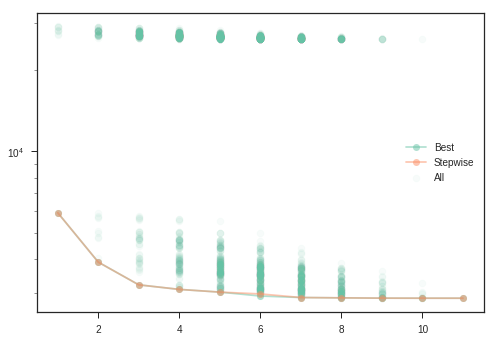

In [4]:
# plot the results
all_results = list(zip(*all_subset_selection(X, Y)))
best_results = list(zip(*best_subset_selection(X, Y)))
stepwise_results = list(zip(*stepwise_subset_selection(X, Y)))

ax = plt.subplot()
plt.scatter(all_results[0], all_results[1], alpha=0.05, label="All")
plt.plot(best_results[0], best_results[1], 'C0o-', alpha=0.5, label="Best")
plt.plot(stepwise_results[0], stepwise_results[1], 'C1o-', alpha=0.5, label="Stepwise")
plt.legend()
ax.set_yscale("log", nonposx='clip')